# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Common imports
import numpy as np
import os
# import cv2
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd

# Normalise the data

In [2]:
url= "brain_stroke_in_numeric_without_useless_data.csv"
brain = pd.read_csv(url)
brain = brain.drop(brain.columns[0], axis=1)
brain.head() 

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,228.69,36.6,2,1
1,0,80.0,0,1,1,105.92,32.5,1,1
2,1,49.0,0,0,1,171.23,34.4,3,1
3,1,79.0,1,0,1,174.12,24.0,1,1
4,0,81.0,0,0,1,186.21,29.0,2,1


In [3]:
features = ['gender','age','hypertension','ever_married', 'avg_glucose_level', 'bmi','smoking_status']
# Separating out the features
x = brain.loc[:, features].values
# Separating out the target
y = brain.loc[:,['stroke']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
brain_std = pd.DataFrame(x, columns=['gender','age','hypertension','ever_married', 'avg_glucose_level', 'bmi','smoking_status'])
brain_std = pd.concat([brain_std, brain[['stroke']]], axis = 1)
brain_std.head()

,gender,age,hypertension,ever_married,avg_glucose_level,bmi,smoking_status,stroke
0,-1.183909,1.040584,-0.326186,0.720137,2.723411,1.193238,0.790469,1
1,-1.183909,1.614270,-0.326186,0.720137,-0.000523,0.589390,-0.178838,1
2,0.844660,0.246250,-0.326186,0.720137,1.448529,0.869222,1.759775,1
3,0.844660,1.570141,3.065738,0.720137,1.512650,-0.662492,-0.178838,1
4,-1.183909,1.658400,-0.326186,0.720137,1.780895,0.073909,0.790469,1


# Binary classifier

In this section, we use the original dataset and not the downsample version

In [4]:
X = brain.iloc[:,0:8]
y = brain.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [5]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
y_pred = knn.predict(X_test)

In [7]:
knn.score(X_test, y_test)

0.9337792642140468

In [8]:
cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring="accuracy")

In [9]:
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.93409742 0.94117647 0.93256815 0.94117647 0.93974175]
cv_scores mean:0.9377520523898986


## Stochastic Gradient Descent (SGD)

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [11]:
sgd_clf.predict(X_test) 


array([0, 0, 0, ..., 0, 0, 0])

In [12]:
sgd_clf.score(X_test, y_test)

0.9304347826086956

# Performance Measures 

Measuring Accuracy Using **Cross-Validation**

In [13]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.93889845, 0.95094664, 0.95008606])

# Confusion Matrix

<div>
<img src="https://miro.medium.com/max/1051/1*fxiTNIgOyvAombPJx5KGeA.png" alt="Confusion Matrix" style="width: 400px;"/>
</div

In [14]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(knn, X_train, y_train, cv=3)

In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[3270,   45],
       [ 166,    5]])

In [16]:
y_train_perfect_predictions = y_train  # pretend we reached perfection
confusion_matrix(y_train, y_train_perfect_predictions)

array([[3315,    0],
       [   0,  171]])

## Precision and Recall

$\large{precision = \frac{TP}{TP+FP}}$

In [17]:
from sklearn.metrics import precision_score, recall_score, classification_report

print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3315
           1       0.10      0.03      0.05       171

    accuracy                           0.94      3486
   macro avg       0.53      0.51      0.51      3486
weighted avg       0.91      0.94      0.92      3486



In [18]:
precision_score(y_train, y_train_pred, average=None)

array([0.95168801, 0.1       ])

In [19]:
3270 / (3270 + 166)

0.9516880093131548

$\large{recall = \frac{TP}{TP+FN}}$

In [20]:
recall_score(y_train, y_train_pred, average=None)

array([0.98642534, 0.02923977])

In [21]:
3270 / (3270 + 45)

0.9864253393665159

$\large{ F_1 = \frac{2}{\frac{1}{precision} + \frac{1}{recall}} = 2 \times\frac{precision \times recall}{precision + recall} = \frac{TP}{TP + \frac{FN+FP}{2}} }$

In [22]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred, average=None)

array([0.96874537, 0.04524887])

In [23]:
3270 / (3270 + (166 + 45) / 2)

0.9687453710561398

## Precision/Recall Trade-off

In [24]:
y_scores = sgd_clf.decision_function(X_test)
y_scores

array([ -298.70379364,  -427.7746963 ,    -3.9714042 , ...,
        -788.72487984,  -691.90056548, -1130.47158112])

In [25]:
threshold = -500
y_some_digit_pred = (y_scores > threshold)

In [26]:
y_some_digit_pred

array([ True,  True,  True, ..., False, False, False])

In [27]:
threshold = -1000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True,  True,  True, ...,  True,  True, False])

In [28]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3,
                             method="decision_function")

In [29]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

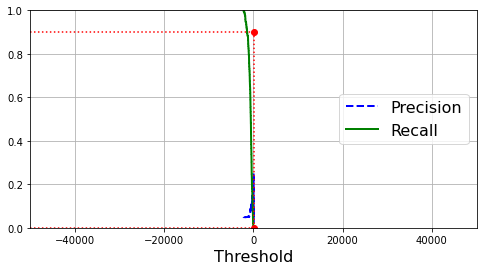

In [30]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.20)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
plt.show()

In [31]:
(y_train_pred == (y_scores > 0)).all()

False

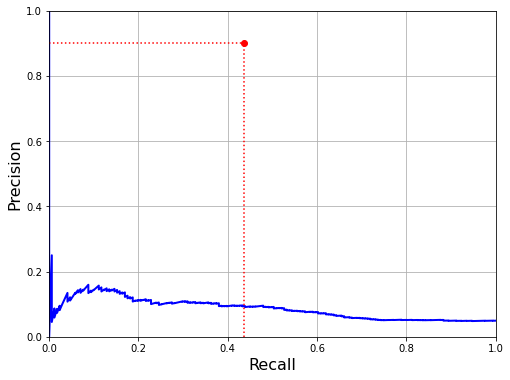

In [32]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
plt.show()

In [33]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.10)]

In [34]:
threshold_90_precision

-488.11114437468905

In [35]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [36]:
precision_score(y_train, y_train_pred_90)

0.1

In [37]:
recall_score(y_train, y_train_pred_90)

0.38011695906432746

# The ROC curves

In [38]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

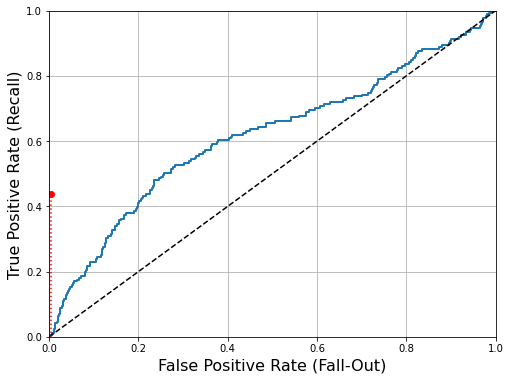

In [39]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

In [40]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores)

0.6156280595909078

In [41]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3,
                                    method="predict_proba")

In [42]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train,y_scores_forest)

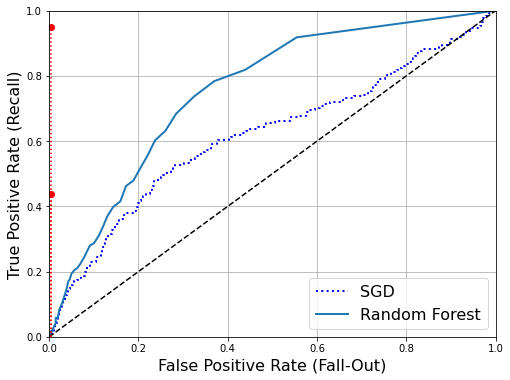

In [43]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.plot([4.837e-3, 4.837e-3], [0., 0.9487], "r:")
plt.plot([4.837e-3], [0.9487], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [44]:
roc_auc_score(y_train, y_scores_forest)

0.7534933361558749

In [45]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3)
precision_score(y_train, y_train_pred_forest)

0.0

In [46]:
recall_score(y_train, y_train_pred_forest)

0.0